In [1]:
# Import necessary libraries
import numpy as np
import random
import math
import matplotlib.pyplot as plt

d:\softwares\Python\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
d:\softwares\Python\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
d:\softwares\Python\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
d:\softwares\Python\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
d:\softwares\Python\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## (A) getData function:
This function generates a dataset based on the given distribution.
It generates random values for X in the range (0, 1) and calculates corresponding Y values using the given formula.

In [2]:
# Function to generate dataset
def getData(variance, N):
    # Generate random X values in the range (0, 1)
    X = np.random.uniform(0, 1, N)
    # Generate random noise values according to the given variance
    Z = np.random.normal(0, variance, N)
    # Calculate Y based on the given formula: Y = cos(2πX) + Z
    Y = np.cos(2 * np.pi * X) + Z
    return np.vstack((X, Y)).T  # Return the dataset as a 2D array of (X, Y) pairs

## (B) getMSE function:
This calculates the Mean Squared Error (MSE) given the predicted y_pred and the actual y.

In [3]:
# Function to calculate Mean Squared Error
def getMSE(y_pred, y):
    mse = np.mean((y - y_pred) ** 2)
    return mse

## (C) GD, SGD, and Mini_batch functions:
These functions perform gradient descent (GD), stochastic gradient descent (SGD), mini-batch gradient descent, and mini-batch gradient descent without regularization, respectively. They update the model weights using the gradients and return the final weights and the mean squared error (Ein) for the training dataset.

In [4]:
# Function for gradient descent optimization
def GD(X, y, n, weights):
    # Gradient Descent parameters
    itr = 2000
    lrate = 0.001
    Ein_list = np.zeros(itr)
    Ein = 0
    lam = 0.1  # weight decay regularization parameter

    # Gradient Descent iterations
    for i in range(itr):
        # Update weights using gradient descent formula with weight decay
        weights = weights * (1 - lam * lrate) - (lrate * (2 / n) * (((X.dot(weights) - y).T).dot(X).T))
        # Calculate mean squared error (Ein) for this iteration
        Ein_list[i] = getMSE(X.dot(weights), y)
    Ein = Ein_list[itr - 1]
    return weights, Ein

In [5]:
# Function for stochastic gradient descent optimization
def SGD(X, Y, n, weights):
    # Stochastic Gradient Descent parameters
    itr = 2000
    lrate = 0.001
    Ein_list = np.zeros(itr)
    Ein = 0
    lam = 0.1  # weight decay regularization parameter

    # Stochastic Gradient Descent iterations
    for i in range(itr):
        # Randomly select a data point for updating weights (stochastic)
        random_index = random.randint(0, n - 1)
        x = X[random_index].reshape(-1, 1)
        y = Y[random_index].reshape(-1, 1)
        # Update weights using stochastic gradient descent formula with weight decay
        weights = weights * (1 - lam * lrate) - (lrate * (2 / n) * (((x * weights - y)) * x))
        # Calculate mean squared error (Ein) for this iteration
        Ein_list[i] = getMSE(X.dot(weights), Y)
    Ein = Ein_list[itr - 1]
    return weights, Ein

In [6]:
# Function for mini-batch gradient descent optimization
def Mini_batch(X, Y, n, weights):
    # Mini-batch Gradient Descent parameters
    itr = 2000
    lrate = 0.001
    batch_size = 50
    Ein_list = np.zeros(itr)
    Ein = 0
    lam = 0.1  # weight decay regularization parameter

    # Mini-batch Gradient Descent iterations
    for i in range(itr):
        # Randomly select a mini-batch of data for updating weights (mini-batch)
        if batch_size >= n:
            x = X
            y = Y
            batch_size = n
        else:
            random_index = random.randint(0, n - batch_size)
            x = X[random_index:random_index + batch_size]
            y = Y[random_index:random_index + batch_size]
        # Update weights using mini-batch gradient descent formula with weight decay
        weights = weights * (1 - lam * lrate) - (lrate * (2 / batch_size) * ((x.dot(weights) - y).T.dot(x).T))
        # Calculate mean squared error (Ein) for this iteration
        Ein_list[i] = getMSE(X.dot(weights), Y)
    Ein = Ein_list[itr - 1]
    return weights, Ein

In [7]:
# Function for mini-batch gradient descent optimization without regularization
def Mini_batch_noreg(X, Y, n, weights):
    # Mini-batch Gradient Descent parameters
    itr = 2000
    lrate = 0.001
    batch_size = 50
    Ein_list = np.zeros(itr)
    Ein = 0

    # Mini-batch Gradient Descent iterations
    for i in range(itr):
        # Randomly select a mini-batch of data for updating weights (mini-batch)
        if batch_size >= n:
            x = X
            y = Y
            batch_size = n
        else:
            random_index = random.randint(0, n - batch_size)
            x = X[random_index:random_index + batch_size]
            y = Y[random_index:random_index + batch_size]
        # Update weights using mini-batch gradient descent formula (no regularization)
        weights -= lrate * (2 / batch_size) * ((x.dot(weights) - y).T.dot(x).T)
        # Calculate mean squared error (Ein) for this iteration
        Ein_list[i] = getMSE(X.dot(weights), Y)
    Ein = Ein_list[itr - 1]
    return weights, Ein

## (D) fitData function:
This function fits the given data to a polynomial of degree d. It prepares the feature matrix X with polynomial features and initializes weights. It then calls the appropriate optimization function (GD, SGD, Mini_batch,) based on the setter argument to fit the data and return the final weights and Ein.

In [8]:
# Function to fit data to a polynomial of a given degree
def fitData(data, d, setter):
    # Split data into X (features) and y (target)
    y = data[:, 1].reshape((len(data), 1))
    x = data[:, 0]

    # Generate the feature matrix with polynomial features
    X = np.ones((1, len(data)))
    for i in range(d):
        X = np.vstack((X, x ** (i + 1)))
    X = X.T

    # Initialize weights
    weights = np.random.random([d + 1, 1])

    # Choose the appropriate optimization method based on the 'setter' argument
    if setter == 1:
        weights, Ein = GD(X, y, len(data), weights)
    elif setter == 2:
        weights, Ein = SGD(X, y, len(data), weights)
    elif setter == 3:
        weights, Ein = Mini_batch(X, y, len(data), weights)
    else:
        weights, Ein = Mini_batch_noreg(X, y, len(data), weights)

    return weights, Ein

In [9]:
# Function to test the model on a testing dataset and calculate Eout
def testing(tdata, weights, d):
    n = len(tdata)
    y = tdata[:, 1].reshape((n, 1))
    x = tdata[:, 0]

    # Generate the feature matrix with polynomial features for testing data
    X = np.ones((1, n))
    for i in range(d):
        X = np.vstack((X, x ** (i + 1)))
    X = X.T

    # Calculate mean squared error (Eout) for the testing
    Eout = getMSE(X.dot(weights), y)
    return Eout

## (E) experiment function:
This function runs the experiment by generating datasets with noise, fitting them to polynomials of a specified degree, and calculating Ein, Eout, and Ebias. It averages these values over multiple trials.

In [10]:
# Modified experiment function to accept the 'setter' argument for optimization method
def experiment(N, variance, d, setter):
    m = 50  # Number of trials
    Ein_list = []
    Eout_list = []
    weight_list = []

    # Run the experiment for 'm' trials
    for i in range(m):
        # Generate a training dataset
        tempdata = getData(variance, N)
        # Fit the training data to a polynomial of degree 'd'
        temp_weight, temp_Ein = fitData(tempdata, d, setter)
        # Generate a separate testing dataset
        temp_test_data = getData(variance, 1000)
        # Calculate Eout for the testing dataset
        temp_Eout = testing(temp_test_data, temp_weight, d)

        # Append Ein, Eout, and weights for this trial
        Ein_list.append(temp_Ein)
        Eout_list.append(temp_Eout)
        weight_list.append(temp_weight)

    # Calculate average Ein, Eout, and weights over all trials
    Ein_avg = np.mean(Ein_list)
    Eout_avg = np.mean(Eout_list)
    weights_avg = np.mean(weight_list, axis=0)

    # Calculate Ebias using a larger dataset
    tempdata = getData(variance, 2000)
    Ebias = testing(tempdata, weights_avg, d)
    Egen = abs(Ein_avg - Eout_avg)  # Calculate generalization error

    return Ein_avg, Eout_avg, Ebias, Egen  # Return average Ein, Eout, Ebias, and Egen

## Results and Plots:

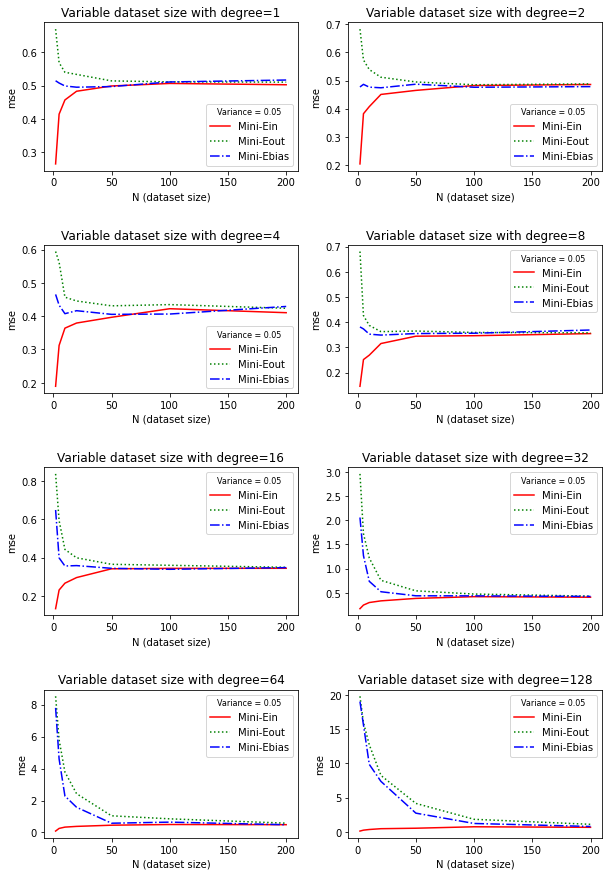

In [11]:
# Plots for σ=0.05
N = [2, 5, 10, 20, 50, 100, 200]
Deg = [1, 2, 4, 8, 16, 32, 64, 128]

# Create subplots for the plots
fig, axes = plt.subplots(4, 2, figsize=(10, 15))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots

# Loop over different polynomial degrees
for i, D in enumerate(Deg):
    Mini_list = [[], [], []]  # List to store Ein, Eout, and Ebias

    # Loop over different dataset sizes
    for j, n in enumerate(N):
        # Run the experiment and obtain Ein, Eout, and Ebias
        Ein, Eout, Ebias, _ = experiment(n, 0.05, D, 3)
        Mini_list[0].append(Ein)
        Mini_list[1].append(Eout)
        Mini_list[2].append(Ebias)

    # Determine subplot row and column
    row = i // 2
    col = i % 2

    # Plot Ein, Eout, and Ebias for this polynomial degree
    axes[row, col].plot(N, Mini_list[0], color='r', linestyle='solid', label='Mini-Ein')
    axes[row, col].plot(N, Mini_list[1], color='g', linestyle='dotted', label='Mini-Eout')
    axes[row, col].plot(N, Mini_list[2], color='b', linestyle='dashdot', label='Mini-Ebias')
    
    # Add the variance string to the legend
    axes[row, col].legend(title='Variance', loc='best')
    axes[row, col].get_legend().get_title().set_fontsize('8')
    axes[row, col].get_legend().set_title('Variance = 0.05')
    
    title = f'Variable dataset size with degree={D}'
    axes[row, col].set_title(title)
    axes[row, col].set_xlabel('N (dataset size)')
    axes[row, col].set_ylabel('mse')

plt.show()

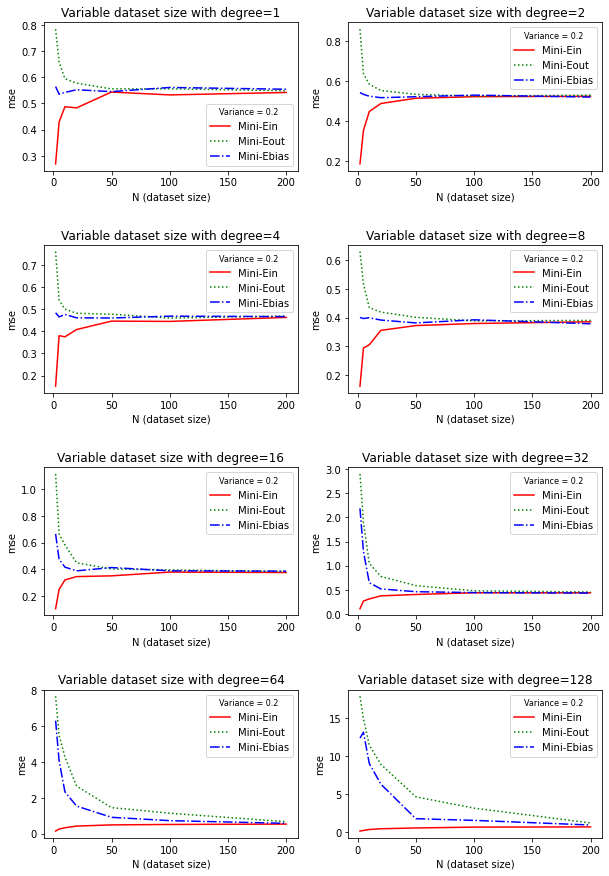

In [12]:
# Plots for σ=0.2
N = [2, 5, 10, 20, 50, 100, 200]
Deg = [1, 2, 4, 8, 16, 32, 64, 128]

# Create subplots for the plots
fig, axes = plt.subplots(4, 2, figsize=(10, 15))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots

# Loop over different polynomial degrees
for i, D in enumerate(Deg):
    Mini_list = [[], [], []]  # List to store Ein, Eout, and Ebias

    # Loop over different dataset sizes
    for j, n in enumerate(N):
        # Run the experiment and obtain Ein, Eout, and Ebias
        Ein, Eout, Ebias, _ = experiment(n, 0.2, D, 3)
        Mini_list[0].append(Ein)
        Mini_list[1].append(Eout)
        Mini_list[2].append(Ebias)

    # Determine subplot row and column
    row = i // 2
    col = i % 2

    # Plot Ein, Eout, and Ebias for this polynomial degree
    axes[row, col].plot(N, Mini_list[0], color='r', linestyle='solid', label='Mini-Ein')
    axes[row, col].plot(N, Mini_list[1], color='g', linestyle='dotted', label='Mini-Eout')
    axes[row, col].plot(N, Mini_list[2], color='b', linestyle='dashdot', label='Mini-Ebias')
    
    # Add the variance string to the legend
    axes[row, col].legend(title='Variance', loc='best')
    axes[row, col].get_legend().get_title().set_fontsize('8')
    axes[row, col].get_legend().set_title('Variance = 0.2')
    
    title = f'Variable dataset size with degree={D}'
    axes[row, col].set_title(title)
    axes[row, col].set_xlabel('N (dataset size)')
    axes[row, col].set_ylabel('mse')

plt.show()


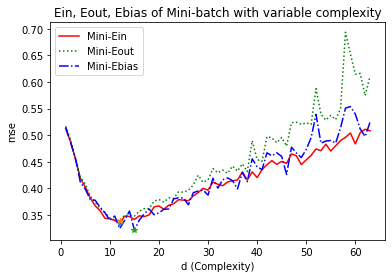

In [13]:
#variable complexity on mse for Mini batch
Mini_list = [[], [], []]
for d in range(1,64):
    t1,t2,t3,t4 = experiment(200,0.1,d,3)
    Mini_list[0].append(t1)
    Mini_list[1].append(t2)
    Mini_list[2].append(t3)

d = [x for x in range(1,64)]

plt.plot(d,Mini_list[0],color='r',linestyle='solid',label='Mini-Ein')
plt.plot(d,Mini_list[1],color='g',linestyle='dotted',label='Mini-Eout')
plt.plot(d,Mini_list[2],color='b',linestyle='dashdot',label='Mini-Ebias')

plt.plot(d[Mini_list[0].index(min(Mini_list[0]))],min(Mini_list[0]),'*')
plt.plot(d[Mini_list[1].index(min(Mini_list[1]))],min(Mini_list[1]),'*')
plt.plot(d[Mini_list[2].index(min(Mini_list[2]))],min(Mini_list[2]),'*')


plt.title('Ein, Eout, Ebias of Mini-batch with variable complexity')
plt.xlabel('d (Complexity)')
plt.ylabel('mse')
plt.legend()
plt.show()

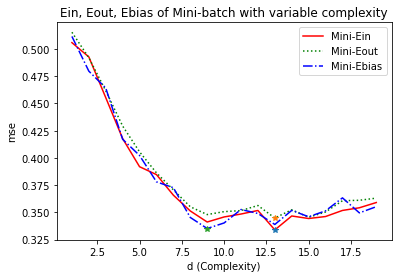

In [14]:
#variable complexity on mse for Mini batch
# Closer look on low complexity dip near 10
Mini_list = [[], [], []]
for d in range(1,20):
    t1,t2,t3,t4 = experiment(200,0.1,d,3)
    Mini_list[0].append(t1)
    Mini_list[1].append(t2)
    Mini_list[2].append(t3)

d = [x for x in range(1,20)]

plt.plot(d,Mini_list[0],color='r',linestyle='solid',label='Mini-Ein')
plt.plot(d,Mini_list[1],color='g',linestyle='dotted',label='Mini-Eout')
plt.plot(d,Mini_list[2],color='b',linestyle='dashdot',label='Mini-Ebias')

plt.plot(d[Mini_list[0].index(min(Mini_list[0]))],min(Mini_list[0]),'*')
plt.plot(d[Mini_list[1].index(min(Mini_list[1]))],min(Mini_list[1]),'*')
plt.plot(d[Mini_list[2].index(min(Mini_list[2]))],min(Mini_list[2]),'*')


plt.title('Ein, Eout, Ebias of Mini-batch with variable complexity')
plt.xlabel('d (Complexity)')
plt.ylabel('mse')
plt.legend()
plt.show()

In [20]:
res=[]
D = [_ for _ in range(21)]
for d in D:
    Ein_avg, Eout_avg, Ebias, Egen = experiment(n,0.2,d,3)
    res.append(Egen)
import pickle
with open('res.pkl','rb') as file:
    res_noreg = pickle.load(file)


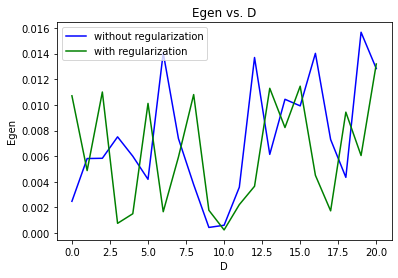

In [21]:
plt.plot(D,res_noreg,color='blue', label='without regularization')
plt.plot(D,res,color='green', label='with regularization')
plt.xlabel('D') 
plt.ylabel('Egen')
plt.title('Egen vs. D')
plt.legend()
plt.show()

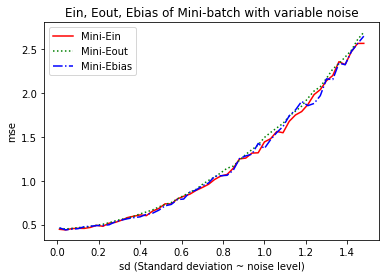

In [17]:
Variance_list = np.arange(0.01,1.5,0.03)
Mini_list = [[], [], []]

for variance_iteration in Variance_list:
    t1,t2,t3,t4 = experiment(100,variance_iteration,3,3)
    Mini_list[0].append(t1)
    Mini_list[1].append(t2)
    Mini_list[2].append(t3)
    
plt.plot(Variance_list,Mini_list[0],color='r',linestyle='solid',label='Mini-Ein')
plt.plot(Variance_list,Mini_list[1],color='g',linestyle='dotted',label='Mini-Eout')
plt.plot(Variance_list,Mini_list[2],color='b',linestyle='dashdot',label='Mini-Ebias')

plt.title('Ein, Eout, Ebias of Mini-batch with variable noise')
plt.xlabel('sd (Standard deviation ~ noise level)')
plt.ylabel('mse')
plt.legend()
plt.show()

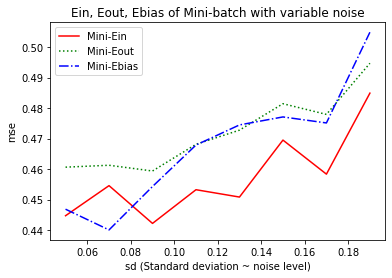

In [18]:
Variance_list = np.arange(0.05,0.2,0.02)
Mini_list = [[], [], []]

for variance_iteration in Variance_list:
    t1,t2,t3,t4 = experiment(100,variance_iteration,3,3)
    Mini_list[0].append(t1)
    Mini_list[1].append(t2)
    Mini_list[2].append(t3)
    
plt.plot(Variance_list,Mini_list[0],color='r',linestyle='solid',label='Mini-Ein')
plt.plot(Variance_list,Mini_list[1],color='g',linestyle='dotted',label='Mini-Eout')
plt.plot(Variance_list,Mini_list[2],color='b',linestyle='dashdot',label='Mini-Ebias')

plt.title('Ein, Eout, Ebias of Mini-batch with variable noise')
plt.xlabel('sd (Standard deviation ~ noise level)')
plt.ylabel('mse')
plt.legend()
plt.show()

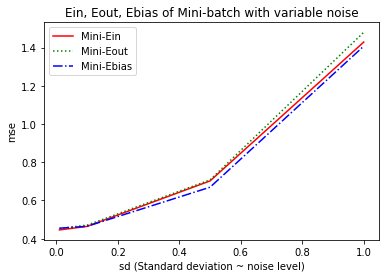

In [19]:
#Variable Noise level
Variance_list = [0.01,0.1,0.5,1]
Mini_list = [[], [], []]

for variance_iteration in Variance_list:
    t1,t2,t3,t4 = experiment(100,variance_iteration,3,3)
    Mini_list[0].append(t1)
    Mini_list[1].append(t2)
    Mini_list[2].append(t3)
    
plt.plot(Variance_list,Mini_list[0],color='r',linestyle='solid',label='Mini-Ein')
plt.plot(Variance_list,Mini_list[1],color='g',linestyle='dotted',label='Mini-Eout')
plt.plot(Variance_list,Mini_list[2],color='b',linestyle='dashdot',label='Mini-Ebias')

plt.title('Ein, Eout, Ebias of Mini-batch with variable noise')
plt.xlabel('sd (Standard deviation ~ noise level)')
plt.ylabel('mse')
plt.legend()
plt.show()